In [5]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import math
import numpy as np
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import SpectralEmbedding

In [1]:
# Create a complete graph with 5 nodes
G = nx.complete_graph(10)

# Generate random weights between 0 and 2 for the edges
weights = {(u, v): random.uniform(0, 2) for u, v in G.edges}

# Add the weights to the edges
nx.set_edge_attributes(G, weights, "weight")

# To check the weights
# for u, v, w in G.edges(data="weight"):
#     print(f"Edge ({u}, {v}) has weight {w:.2f}")

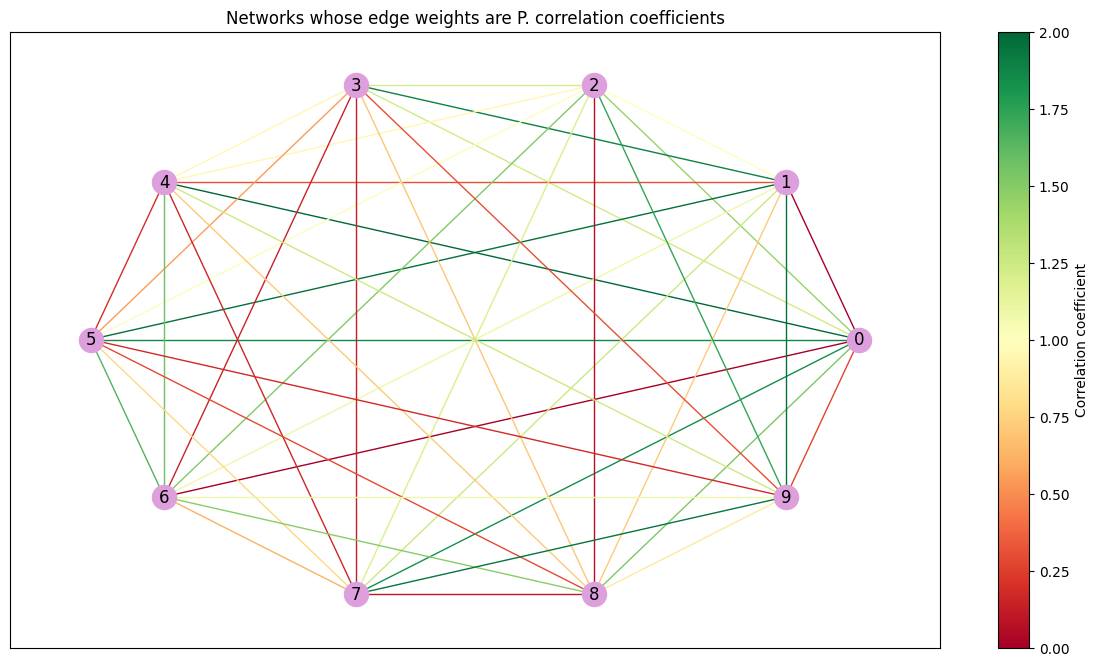

In [11]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
fig, axs = plt.subplots(figsize=(15,8))
nx.draw_networkx(G, ax=axs, pos=nx.circular_layout(G), node_color='plum', edgelist=edges, edge_color=weights, edge_cmap=plt.cm.RdYlGn)
norm2 = mpl.colors.Normalize(vmin=0, vmax=2)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=plt.cm.RdYlGn),
             ax=axs, orientation='vertical', label='Correlation coefficient')
plt.title('Networks whose edge weights are P. correlation coefficients')
plt.show()

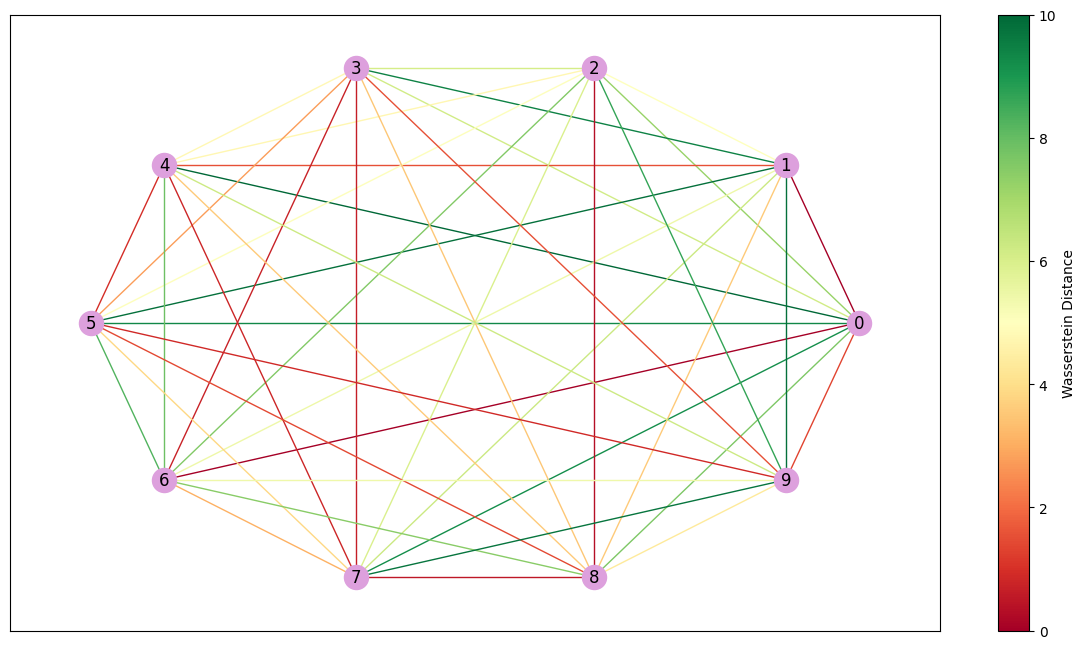

In [89]:
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())
fig, axs = plt.subplots(figsize=(15,8))
nx.draw_networkx(G, ax=axs, pos=nx.circular_layout(G), node_color='plum', edgelist=edges, edge_color=weights, edge_cmap=plt.cm.RdYlGn)
norm2 = mpl.colors.Normalize(vmin=0, vmax=10)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=plt.cm.RdYlGn),
             ax=axs, orientation='vertical', label='Wasserstein Distance')
# plt.title('Networks whose edge weights are P. correlation coefficients')
plt.show()

In [3]:
# get the adjacency matrix
nx.adjacency_matrix(G).toarray()

array([[0.        , 0.01363798, 1.4256821 , 1.21925117, 1.97170075,
        1.83471334, 0.01591271, 1.81732644, 1.51227768, 0.27979147],
       [0.01363798, 0.        , 0.99742172, 1.85890863, 0.31639179,
        1.93899195, 1.07933159, 1.23784013, 0.71183956, 1.93755634],
       [1.4256821 , 0.99742172, 0.        , 1.20038811, 0.93975349,
        1.00635844, 1.49007153, 1.17724497, 0.07609828, 1.70400017],
       [1.21925117, 1.85890863, 1.20038811, 0.        , 0.94980993,
        0.55138553, 0.15500218, 0.13703642, 0.69628894, 0.31836494],
       [1.97170075, 0.31639179, 0.93975349, 0.94980993, 0.        ,
        0.1989399 , 1.55842658, 0.17398103, 0.71661762, 1.23214549],
       [1.83471334, 1.93899195, 1.00635844, 0.55138553, 0.1989399 ,
        0.        , 1.63431405, 0.7679781 , 0.29238499, 0.18611384],
       [0.01591271, 1.07933159, 1.49007153, 0.15500218, 1.55842658,
        1.63431405, 0.        , 0.61050723, 1.47292192, 1.07207039],
       [1.81732644, 1.23784013, 1.1772449

In [6]:
# get the adjacency matrix
adj = nx.adjacency_matrix(G).toarray()
pd.DataFrame(adj)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.013638,1.425682,1.219251,1.971701,1.834713,0.015913,1.817326,1.512278,0.279791
1,0.013638,0.000000,0.997422,1.858909,0.316392,1.938992,1.079332,1.237840,0.711840,1.937556
2,1.425682,0.997422,0.000000,1.200388,0.939753,1.006358,1.490072,1.177245,0.076098,1.704000
3,1.219251,1.858909,1.200388,0.000000,0.949810,0.551386,0.155002,0.137036,0.696289,0.318365
4,1.971701,0.316392,0.939753,0.949810,0.000000,0.198940,1.558427,0.173981,0.716618,1.232145
5,1.834713,1.938992,1.006358,0.551386,0.198940,0.000000,1.634314,0.767978,0.292385,0.186114
6,0.015913,1.079332,1.490072,0.155002,1.558427,1.634314,0.000000,0.610507,1.472922,1.072070
7,1.817326,1.237840,1.177245,0.137036,0.173981,0.767978,0.610507,0.000000,0.118702,1.914721
8,1.512278,0.711840,0.076098,0.696289,0.716618,0.292385,1.472922,0.118702,0.000000,0.855545
9,0.279791,1.937556,1.704000,0.318365,1.232145,0.186114,1.072070,1.914721,0.855545,0.000000


In [9]:
def heatKernel(x):
    return math.exp(-math.pow(x,2))
adj_exp = list(map(heatKernel, np.array(adj).flatten()))
print(np.min(adj_exp), np.max(adj_exp))
adj_exp_min = np.min(adj_exp)
adj_exp_max = np.max(adj_exp)
adj_exp = np.array(adj_exp).reshape(10,10)
pd.DataFrame(adj_exp)

0.020494394584461055 1.0


,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.999814,0.130998,0.226146,0.020494,0.034521,0.999747,0.036785,0.101572,0.924702
1,0.999814,1.000000,0.369779,0.031570,0.904744,0.023291,0.311936,0.216049,0.602471,0.023421
2,0.130998,0.369779,1.000000,0.236707,0.413484,0.363216,0.108575,0.250097,0.994226,0.054825
3,0.226146,0.031570,0.236707,1.000000,0.405701,0.737842,0.976261,0.981396,0.615809,0.903611
4,0.020494,0.904744,0.413484,0.405701,1.000000,0.961196,0.088152,0.970184,0.598373,0.219110
5,0.034521,0.023291,0.363216,0.737842,0.961196,1.000000,0.069184,0.554444,0.918063,0.965955
6,0.999747,0.311936,0.108575,0.976261,0.088152,0.069184,1.000000,0.688859,0.114235,0.316847
7,0.036785,0.216049,0.250097,0.981396,0.970184,0.554444,0.688859,1.000000,0.986009,0.025575
8,0.101572,0.602471,0.994226,0.615809,0.598373,0.918063,0.114235,0.986009,1.000000,0.480966
9,0.924702,0.023421,0.054825,0.903611,0.219110,0.965955,0.316847,0.025575,0.480966,1.000000


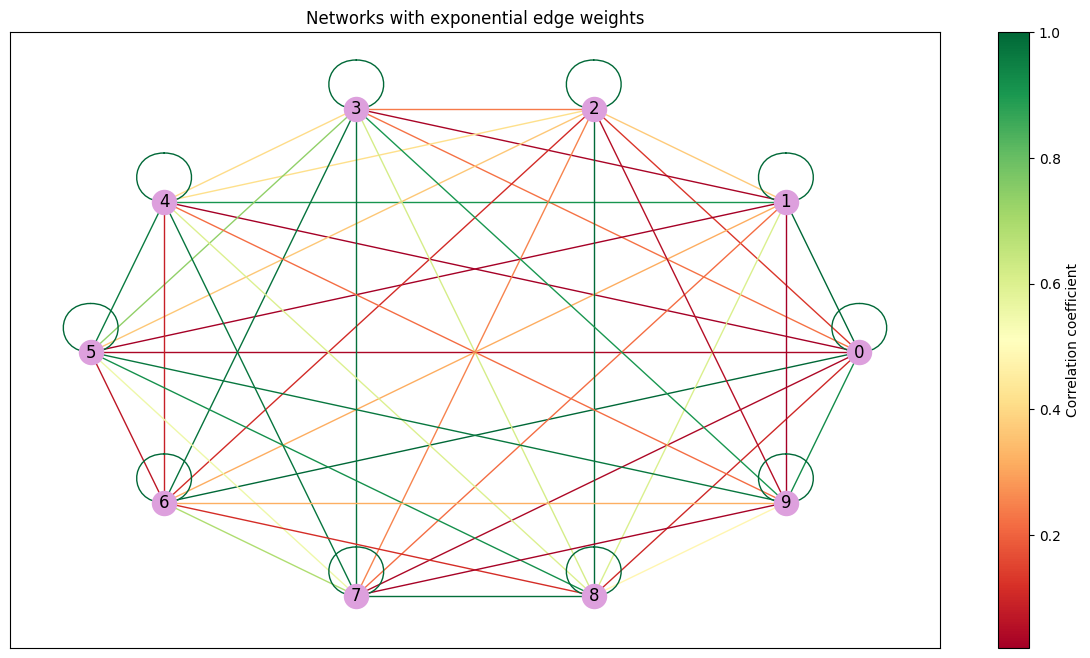

In [12]:
# reconstruct a graph with the new weights
G_exp = nx.from_numpy_array(adj_exp)

edges,weights = zip(*nx.get_edge_attributes(G_exp,'weight').items())
fig, axs = plt.subplots(figsize=(15,8))
nx.draw_networkx(G_exp, ax=axs, pos=nx.circular_layout(G_exp), node_color='plum', edgelist=edges, edge_color=weights, edge_cmap=plt.cm.RdYlGn)
norm2 = mpl.colors.Normalize(vmin=adj_exp_min, vmax=adj_exp_max)
fig.colorbar(mpl.cm.ScalarMappable(norm=norm2, cmap=plt.cm.RdYlGn),
             ax=axs, orientation='vertical', label='Correlation coefficient')
plt.title('Networks with exponential edge weights')
plt.show()

In [14]:
# its laplacian matrix and eigenvalues of it
L = nx.laplacian_matrix(G_exp)
pd.DataFrame(L)

,0,1,2,3,4,5,6,7,8,9
0,3.474781,-0.999814,-0.130998,-0.226146,-0.020494,-0.034521,-0.999747,-0.036785,-0.101572,-0.924702
1,-0.999814,3.483075,-0.369779,-0.031570,-0.904744,-0.023291,-0.311936,-0.216049,-0.602471,-0.023421
2,-0.130998,-0.369779,2.921907,-0.236707,-0.413484,-0.363216,-0.108575,-0.250097,-0.994226,-0.054825
3,-0.226146,-0.031570,-0.236707,5.115043,-0.405701,-0.737842,-0.976261,-0.981396,-0.615809,-0.903611
4,-0.020494,-0.904744,-0.413484,-0.405701,4.581438,-0.961196,-0.088152,-0.970184,-0.598373,-0.219110
5,-0.034521,-0.023291,-0.363216,-0.737842,-0.961196,4.627712,-0.069184,-0.554444,-0.918063,-0.965955
6,-0.999747,-0.311936,-0.108575,-0.976261,-0.088152,-0.069184,3.673796,-0.688859,-0.114235,-0.316847
7,-0.036785,-0.216049,-0.250097,-0.981396,-0.970184,-0.554444,-0.688859,4.709397,-0.986009,-0.025575
8,-0.101572,-0.602471,-0.994226,-0.615809,-0.598373,-0.918063,-0.114235,-0.986009,5.411725,-0.480966
9,-0.924702,-0.023421,-0.054825,-0.903611,-0.219110,-0.965955,-0.316847,-0.025575,-0.480966,3.915012


In [17]:
nx.laplacian_spectrum(G_exp).tolist()

[-1.6610371088691904e-15,
 2.437322712020424,
 2.9623403503124437,
 3.569733104458699,
 3.7290448780029974,
 5.236784158496492,
 5.474705775384264,
 5.760951877990841,
 6.184217375891887,
 6.558785107538539]

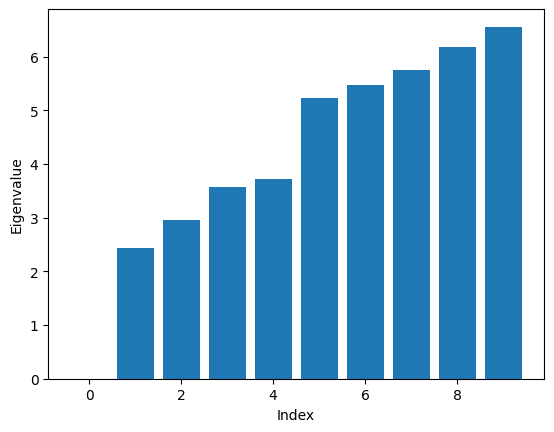

In [21]:
plt.bar(range(len(nx.laplacian_spectrum(G_exp).tolist())),nx.laplacian_spectrum(G_exp).tolist())
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.show()

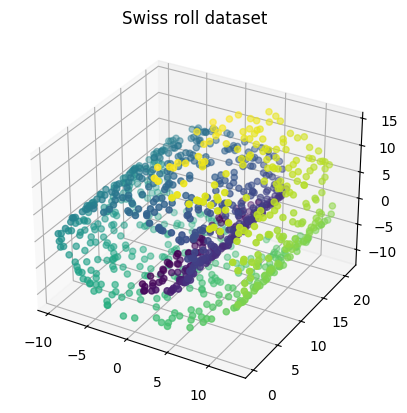

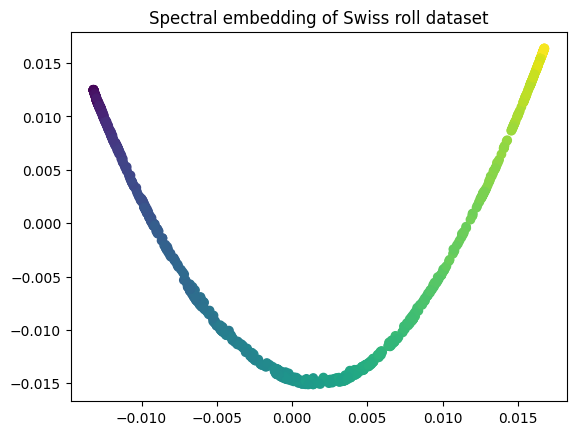

In [30]:
# Generate the Swiss roll dataset
X, y = make_swiss_roll(n_samples=1000, noise=0.1, random_state=42)

# Plot the dataset
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.set_title('Swiss roll dataset')
plt.show()

# Apply spectral embedding
se = SpectralEmbedding(
    n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=42)
X_se = se.fit_transform(X)

# Plot the embedded data
plt.scatter(X_se[:, 0], X_se[:, 1], c=y)
plt.title('Spectral embedding of Swiss roll dataset')
plt.show()

In [68]:
# wasserstein distance in optimal transport to measure similairy between two different probability distributions
# it can be understood as the cost of an optimal transport plan to convert one distribution to the other

from numpy import random
u = random.normal(loc=5, scale=3, size=500)
v = random.normal(loc=10, scale=1, size=500)

df = pd.DataFrame([u,v])
df = df.T
df = df.rename(columns={0:'u',1:'v'})
df

,u,v
0,-2.005439,9.189860
1,9.392926,9.575641
2,11.182926,9.816763
3,6.623574,9.356981
4,1.218076,10.585765
...,...,...
495,0.717154,11.873398
496,6.499835,8.099730
497,3.026129,10.206993
498,9.146458,8.627313


In [ ]:
# Sort the data
u_sorted = np.sort(u)
v_sorted = np.sort(v)

# Compute the cumulative distribution functions
cdf_u = np.arange(1, len(u_sorted) + 1) / len(u_sorted)
cdf_v = np.arange(1, len(v_sorted) + 1) / len(v_sorted)

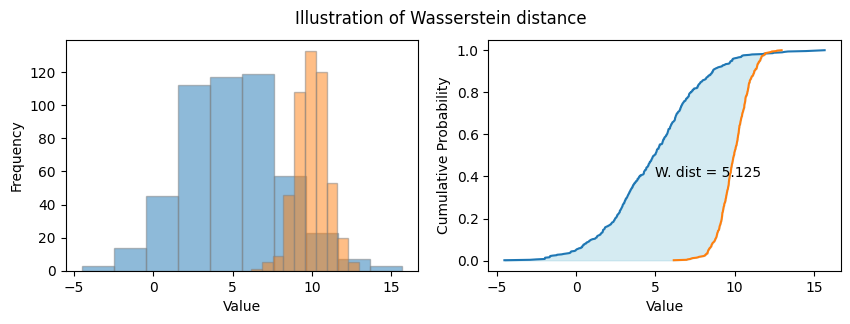

In [91]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
axs[0].hist(u, alpha=0.5, edgecolor='gray')
axs[0].hist(v, alpha=0.5, edgecolor='gray')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

# Plot the CDFs
axs[1].plot(u_sorted, cdf_u)
axs[1].plot(v_sorted, cdf_v)

# Fill the region between the CDFs
axs[1].fill_betweenx(cdf_u, u_sorted, v_sorted, where=(u_sorted < v_sorted), color='lightblue', alpha=0.5, label='Filled Region')
axs[1].text(5, 0.4, 'W. dist = 5.125')
# Add labels and legend
axs[1].set_xlabel('Value')
axs[1].set_ylabel('Cumulative Probability')
plt.suptitle('Illustration of Wasserstein distance')
plt.show()

In [83]:
from scipy.stats import wasserstein_distance
wasserstein_distance(u, v)

5.1245846419012375